In [1]:
import requests 
import gzip, shutil
import os 
import data_utils as du 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from six.moves import cPickle as pickle
import numpy as np
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt 
import platform
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Data_folder = 'CIFAR10_Data'
Data_fn = 'cifar-10-python'
cifar_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
#Chang to true if need download data 
Down_load_data = False 
if Down_load_data:
    r = requests.get(cifar_url,allow_redirects=True)
    open(os.path.join(Data_folder,Data_fn+'.tar.gz'),'wb').write(r.content)
    #Unzip the data



In [2]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from six.moves import cPickle as pickle
import numpy as np
import os
from matplotlib.pyplot import imread
import platform

def load_pickle(f):
  version = platform.python_version_tuple()
  if version[0] == '2':
      return  pickle.load(f)
  elif version[0] == '3':
      return  pickle.load(f, encoding='latin1')
  raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(fn):
    with open(fn, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000,subtract_mean=True):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for training  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'CIFAR10_Data/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    ## Data post_process 
   
    if subtract_mean:
        mean_image = np.mean(X_train, axis=0)
        X_train -= mean_image
        X_val -= mean_image
        X_test -= mean_image
    return X_train, y_train, X_val, y_val, X_test, y_test


## Question 1 


In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =True)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,) int64
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


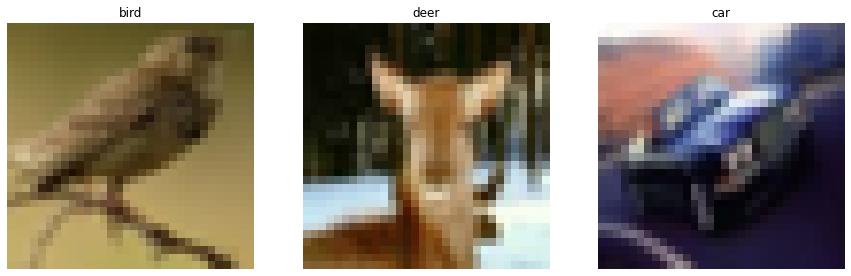

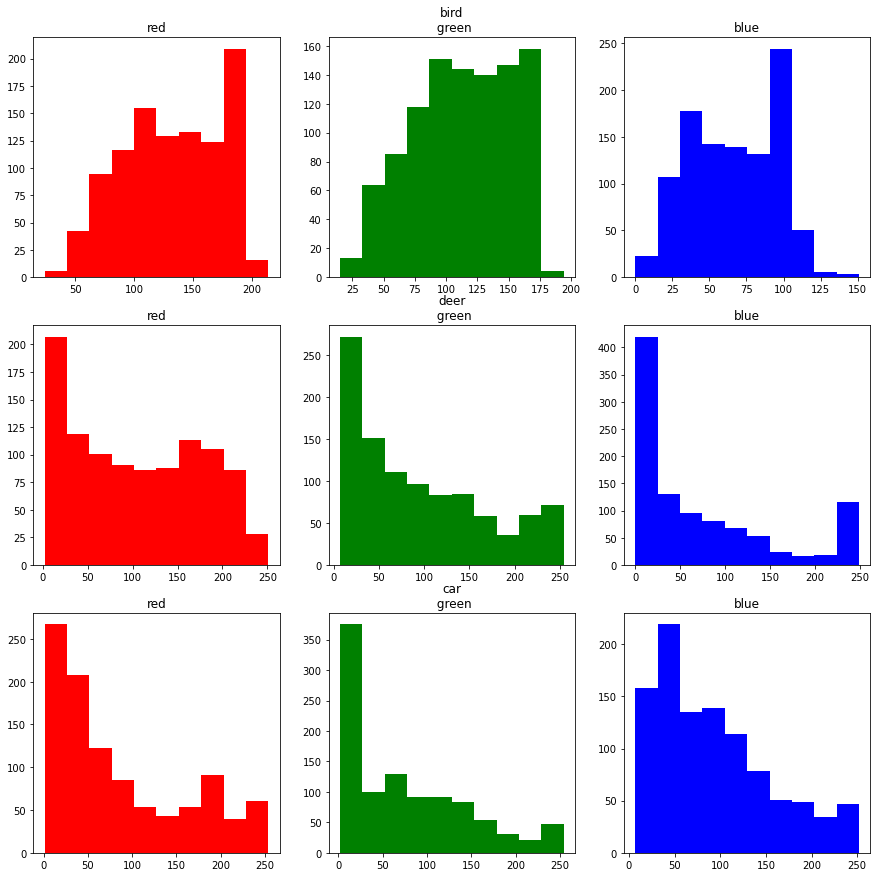

In [116]:
import random
import matplotlib.pyplot as plt 

random.seed('sed') 
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_num = 3 
image_idx = [random.randint(0,X_train.shape[0]) for p in range(0,image_num)]
for plt_idx, idx in enumerate(image_idx):
    cls = classes[y_train[idx]]
    plt.subplot(1,3,plt_idx+1)
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls)
plt.savefig('cifar10.jpeg')
plt.show()

# plot hisgram
for i, idx in enumerate(image_idx):
    img = X_train[idx].copy()
    cls = classes[y_train[idx]]
    for color_c in range(3):
        plt_idx = i*len(image_idx) +  color_c + 1 
        plt.subplot(len(image_idx),3,plt_idx)
        if color_c ==0:
            color = 'red'
            plt.title('red')
        elif color_c ==1:
            color = 'green'
            plt.title(cls+'\n green')
        elif color_c ==2:
            color = 'blue'
            plt.title('blue')
        plt.hist(img[:,:,color_c].reshape(-1),color=color)
plt.savefig('hist.jpeg')
plt.show()



## Question2 
 

# Construct model 
## Question 3


In [117]:
from cnn_model import *
options = {
    'conv1_out' : 18,
    'conv2_out' : 32,
    'fc0_out' : 120,
    'fc1_out' : 80,
}
model = Lennet5(in_channel=3, out_channel=10,options=options)

device = '/device:GPU:0'
#x = tf.placeholder(tf.float32, (None,32,32,3))
input_shape = (2, 32, 32, 3)
model.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
model.summary()





Model: "lennet5_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 18)        1368      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 10, 10, 32)        14432     
_________________________________________________________________
max_pooling2d_28 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 120)               96120     
_________________________________________________________________
dense_85 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_86 (Dense)             (None, 10)                8

In [118]:
from solver import Solver
#model = ThreeLayerConvNet(12, 8, 10)
model = Lennet5(in_channel=3, out_channel=10)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'sgd',
    'lr': 0.01,
    'epoch_num': 20,
}

solver= Solver(model,data_set,options=train_options)
solver.train()


Iteration 0, Epoch 1/20, Loss: 2.3025856018066406, Accuracy: 6.25, Val Loss: 2.302597761154175, Val Accuracy: 10.5
Iteration 100, Epoch 1/20, Loss: 2.302677631378174, Accuracy: 9.777227401733398, Val Loss: 2.3028757572174072, Val Accuracy: 7.90000057220459
Iteration 200, Epoch 1/20, Loss: 2.3026270866394043, Accuracy: 9.561567306518555, Val Loss: 2.3031301498413086, Val Accuracy: 7.800000190734863
Iteration 300, Epoch 1/20, Loss: 2.3026320934295654, Accuracy: 9.696844100952148, Val Loss: 2.3027021884918213, Val Accuracy: 7.90000057220459
Iteration 400, Epoch 1/20, Loss: 2.302626371383667, Accuracy: 9.772443771362305, Val Loss: 2.302675247192383, Val Accuracy: 10.199999809265137
Iteration 500, Epoch 1/20, Loss: 2.302609920501709, Accuracy: 9.799151420593262, Val Loss: 2.3028078079223633, Val Accuracy: 7.90000057220459
Iteration 600, Epoch 1/20, Loss: 2.3026485443115234, Accuracy: 9.790973663330078, Val Loss: 2.3027992248535156, Val Accuracy: 7.90000057220459


KeyboardInterrupt: 

## Question 5

Loss: 2.8652586936950684,Test Accuracy: 38.650001525878906


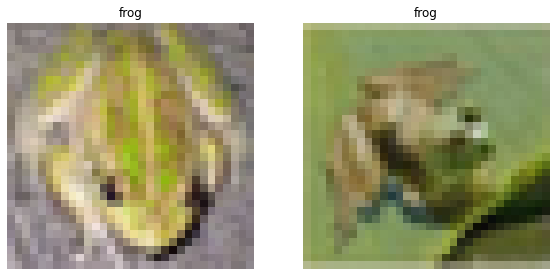

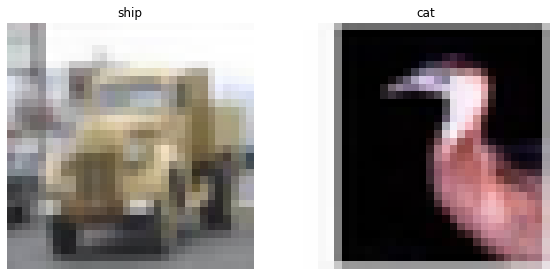

In [108]:
#Get the test accuracy 
random.seed('sedd')
solver.test_model(X_test,y_test)
predict_label = solver.predict(X_test)
pred_table = np.equal(predict_label,y_test)
false_pred_idx = np.where(pred_table == False)[0]
correct_pred_idx = np.where(pred_table == True)[0]
np.random.shuffle(false_pred_idx)
np.random.shuffle(correct_pred_idx)
#print(correct_pred_idx[0])

for plt_idx, idx in enumerate(correct_pred_idx[0:2]):
    cls = classes[y_test[idx]]
    plt.subplot(1,3,plt_idx+1)
    plt.imshow(X_test[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls)
plt.show()

for plt_idx, idx in enumerate(false_pred_idx[0:2]):
    cls = classes[predict_label[idx]]
    plt.subplot(1,3,plt_idx+1)
    plt.imshow(X_test[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls)
plt.show()





## Question 7


58001708984, Val Loss: 1.641002893447876, Val Accuracy: 40.29999923706055
INFO:tensorflow:Assets written to: saved_model/trained_10/assets
Iteration 16900, Epoch 12/20, Loss: 1.5978037118911743, Accuracy: 39.22193908691406, Val Loss: 1.576532006263733, Val Accuracy: 41.60000228881836
Iteration 17000, Epoch 12/20, Loss: 1.6073970794677734, Accuracy: 40.41526794433594, Val Loss: 1.5925248861312866, Val Accuracy: 43.099998474121094
Iteration 17100, Epoch 12/20, Loss: 1.5956192016601562, Accuracy: 40.78815460205078, Val Loss: 1.6198917627334595, Val Accuracy: 41.400001525878906
Iteration 17200, Epoch 12/20, Loss: 1.5874974727630615, Accuracy: 41.520416259765625, Val Loss: 1.4789009094238281, Val Accuracy: 46.099998474121094
Iteration 17300, Epoch 12/20, Loss: 1.5762633085250854, Accuracy: 41.822105407714844, Val Loss: 1.4566400051116943, Val Accuracy: 48.29999923706055
Iteration 17400, Epoch 12/20, Loss: 1.5692368745803833, Accuracy: 42.16757583618164, Val Loss: 1.4900909662246704, Val Acc

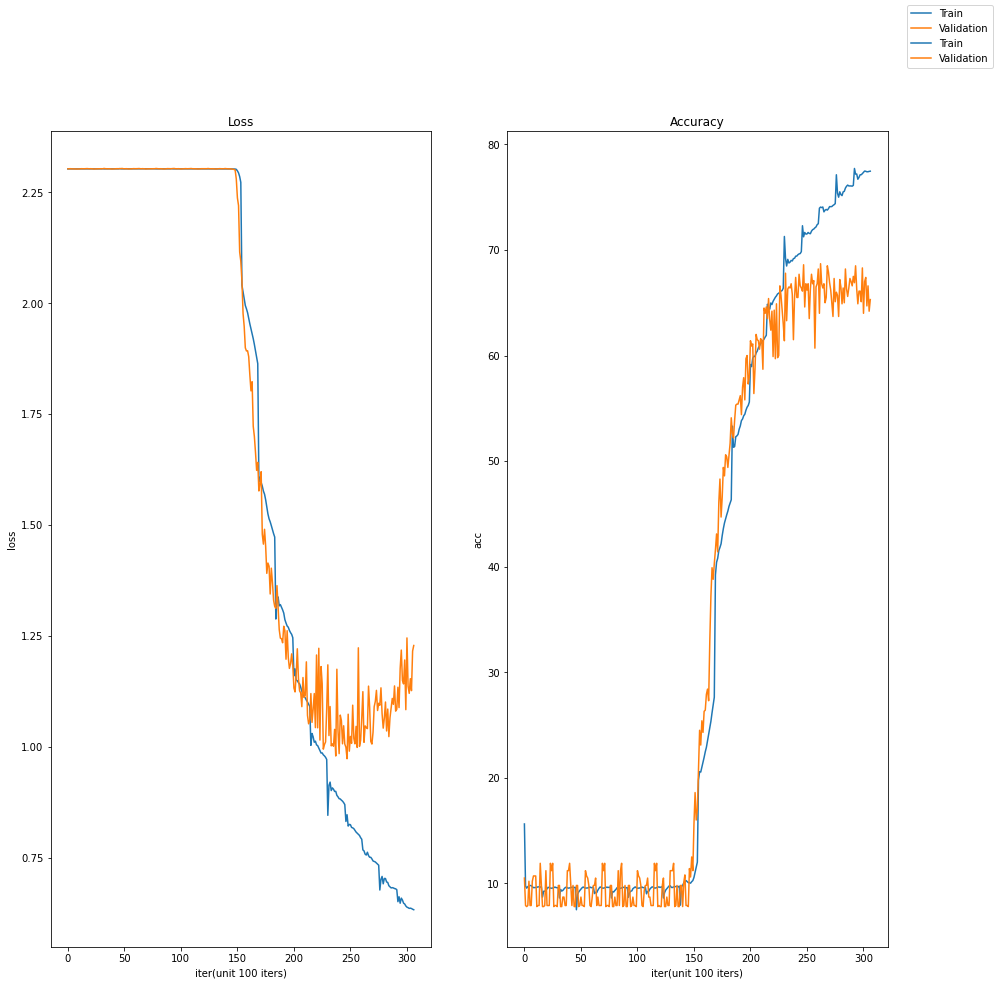

In [123]:
model_option = {
    'conv_reg':0.05, 
}
model = Lennet5(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'sgd',
    'lr': 0.01,
    'epoch_num': 20,
}

solver= Solver(model,data_set,options=train_options)
solver.train()

In [124]:
solver.test_model(X_test,y_test)

Loss: 1.2192533016204834,Test Accuracy: 65.90999603271484


(<tf.Tensor: shape=(), dtype=float32, numpy=1.2192533>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6591>)

## Question 8

:Assets written to: saved_model/trained_50/assets
Iteration 78200, Epoch 52/60, Loss: 0.5258543491363525, Accuracy: 82.69927215576172, Val Loss: 1.5497592687606812, Val Accuracy: 64.30000305175781
Iteration 78300, Epoch 52/60, Loss: 0.5653084516525269, Accuracy: 81.54586029052734, Val Loss: 1.4870330095291138, Val Accuracy: 63.5
Iteration 78400, Epoch 52/60, Loss: 0.578650712966919, Accuracy: 80.8201675415039, Val Loss: 1.4637095928192139, Val Accuracy: 63.20000457763672
Iteration 78500, Epoch 52/60, Loss: 0.582396924495697, Accuracy: 80.31842803955078, Val Loss: 1.4175572395324707, Val Accuracy: 63.20000457763672
Iteration 78600, Epoch 52/60, Loss: 0.5911741852760315, Accuracy: 79.95735168457031, Val Loss: 1.4876657724380493, Val Accuracy: 61.79999542236328
Iteration 78700, Epoch 52/60, Loss: 0.5899778604507446, Accuracy: 80.1186294555664, Val Loss: 1.5247622728347778, Val Accuracy: 61.29999923706055
Iteration 78800, Epoch 52/60, Loss: 0.5954023003578186, Accuracy: 79.97010040283203, 

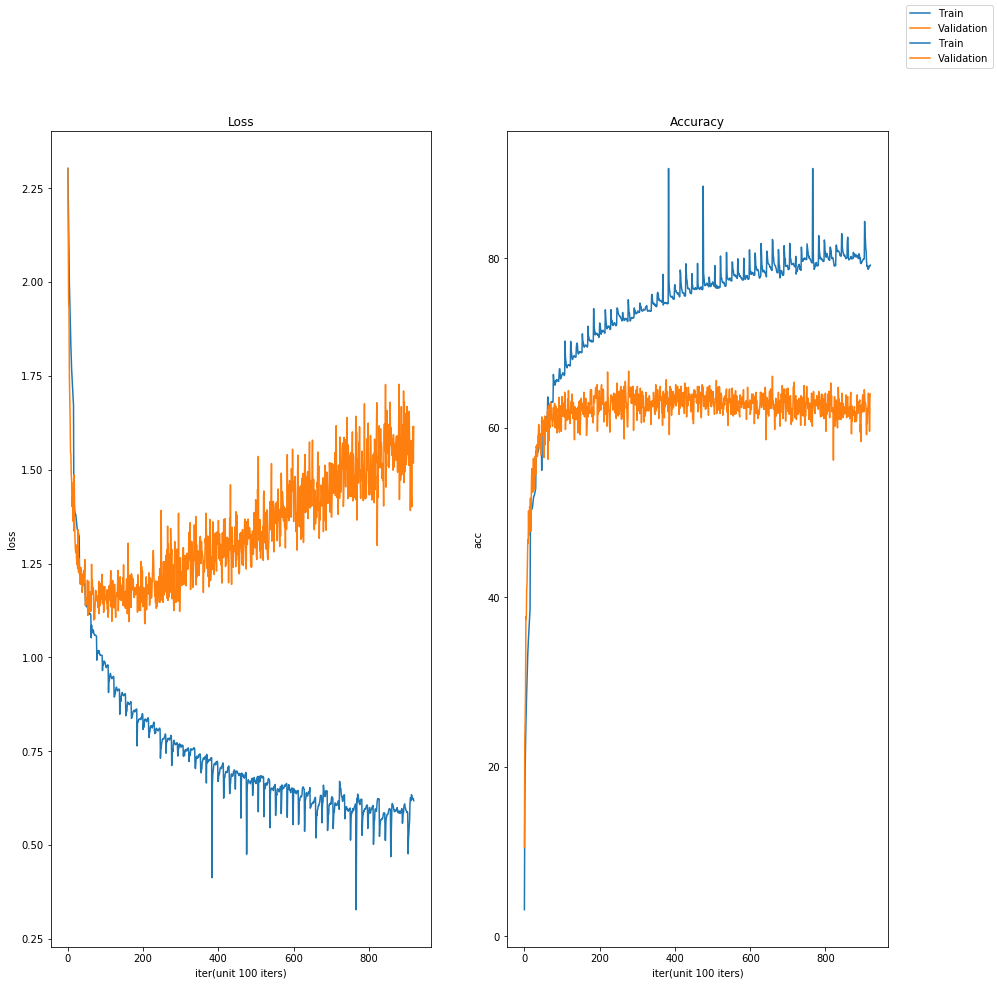

In [12]:
from cnn_model import *
from solver import *
model_option = {
    'conv_reg':0.00, 
}
adam_model = Lennet5(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.001,
    'epoch_num': 60,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()

In [13]:
solver.test_model(X_test,y_test)

Loss: 1.4907666444778442,Test Accuracy: 63.80000305175781


(<tf.Tensor: shape=(), dtype=float32, numpy=1.4907666>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.638>)

: 9.811046600341797, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 400, Epoch 1/10, Loss: 14.528607368469238, Accuracy: 9.671134948730469, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 500, Epoch 1/10, Loss: 14.533206939697266, Accuracy: 9.680638313293457, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 600, Epoch 1/10, Loss: 14.523702621459961, Accuracy: 9.764975547790527, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 700, Epoch 1/10, Loss: 14.508296012878418, Accuracy: 9.878745079040527, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 800, Epoch 1/10, Loss: 14.513076782226562, Accuracy: 9.862671852111816, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 900, Epoch 1/10, Loss: 14.501142501831055, Accuracy: 9.947280883789062, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 1000, Epoch 1/10, Loss: 14.498637199401855, Accuracy: 9.97127914428711, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 110

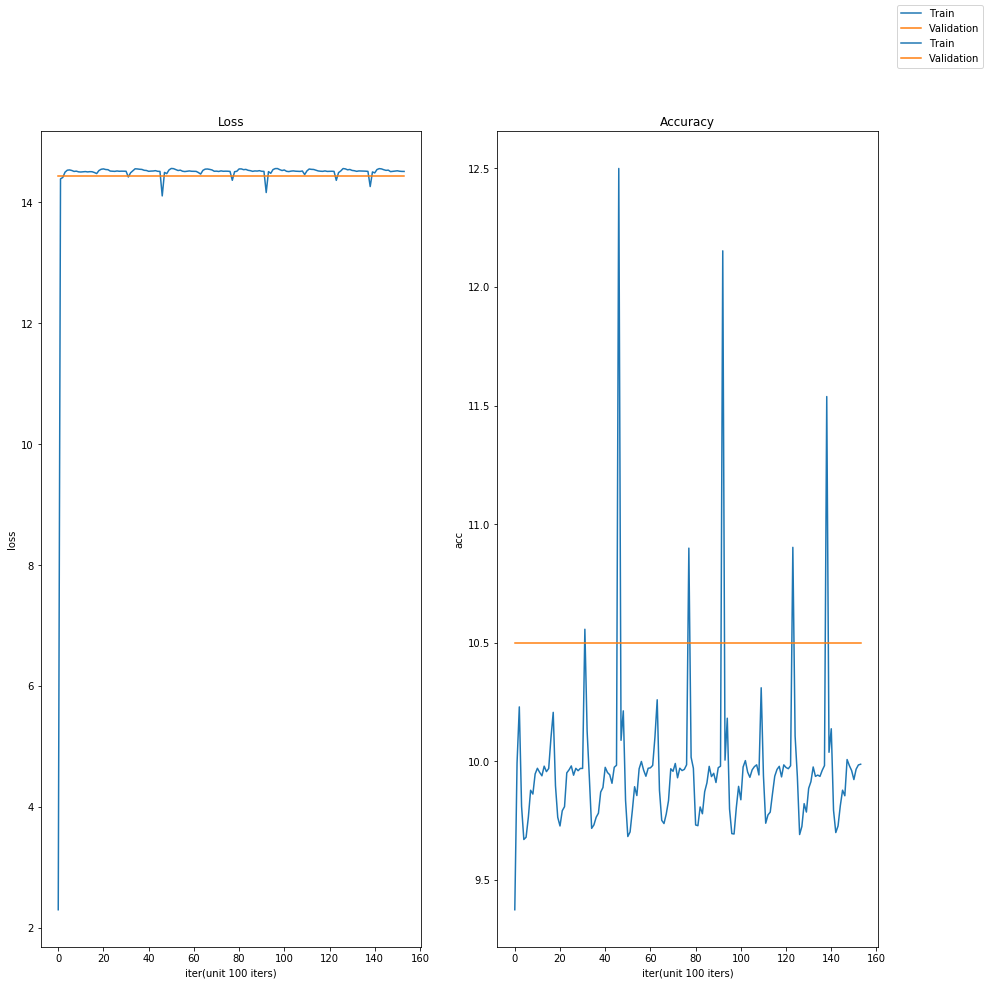

 9.800663948059082, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 400, Epoch 1/10, Loss: 14.528607368469238, Accuracy: 9.663341522216797, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 500, Epoch 1/10, Loss: 14.533206939697266, Accuracy: 9.67440128326416, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 600, Epoch 1/10, Loss: 14.523702621459961, Accuracy: 9.759775161743164, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 700, Epoch 1/10, Loss: 14.508296012878418, Accuracy: 9.874286651611328, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 800, Epoch 1/10, Loss: 14.513076782226562, Accuracy: 9.858770370483398, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 900, Epoch 1/10, Loss: 14.501142501831055, Accuracy: 9.943812370300293, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 1000, Epoch 1/10, Loss: 14.498637199401855, Accuracy: 9.968156814575195, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 1100

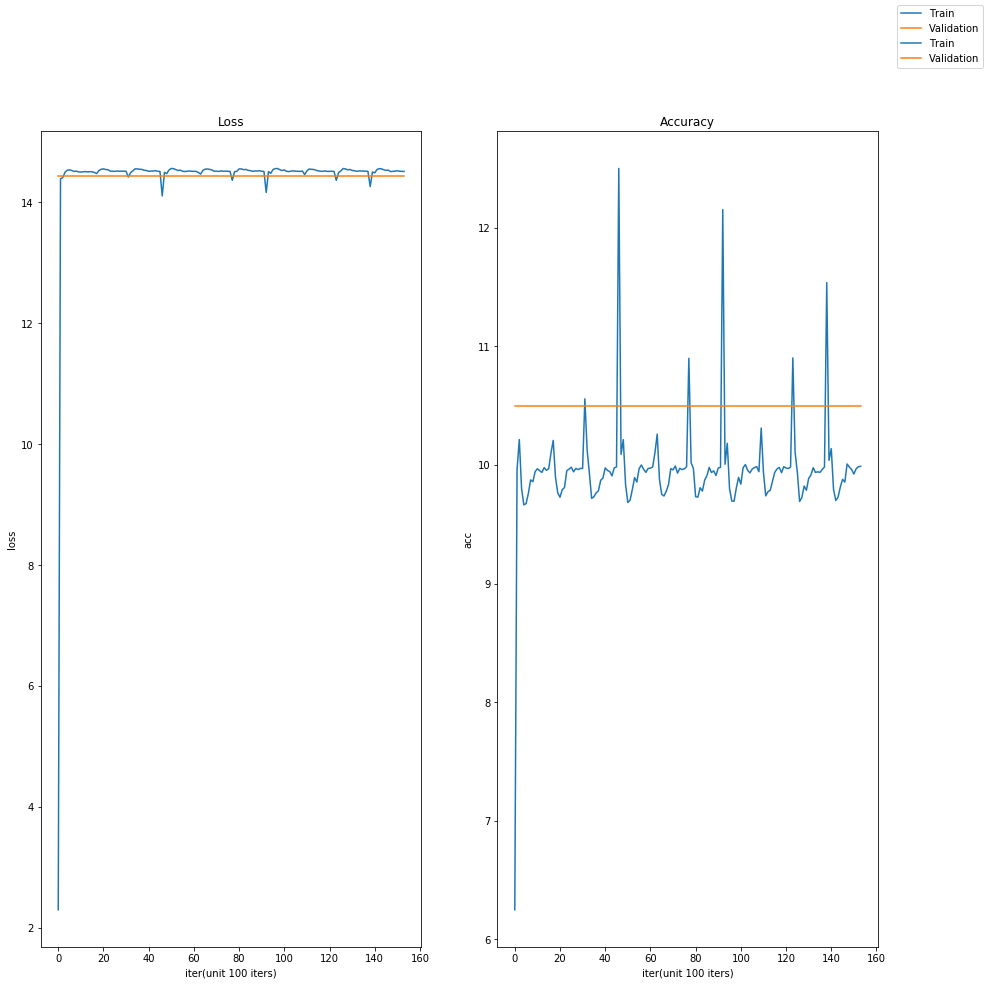

 9.821428298950195, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 400, Epoch 1/10, Loss: 14.528607368469238, Accuracy: 9.678927421569824, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 500, Epoch 1/10, Loss: 14.533206939697266, Accuracy: 9.68687629699707, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 600, Epoch 1/10, Loss: 14.523702621459961, Accuracy: 9.770174980163574, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 700, Epoch 1/10, Loss: 14.508296012878418, Accuracy: 9.88320255279541, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 800, Epoch 1/10, Loss: 14.513076782226562, Accuracy: 9.866573333740234, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 900, Epoch 1/10, Loss: 14.501142501831055, Accuracy: 9.950748443603516, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 1000, Epoch 1/10, Loss: 14.498637199401855, Accuracy: 9.974400520324707, Val Loss: 14.425701141357422, Val Accuracy: 10.5
Iteration 1100,

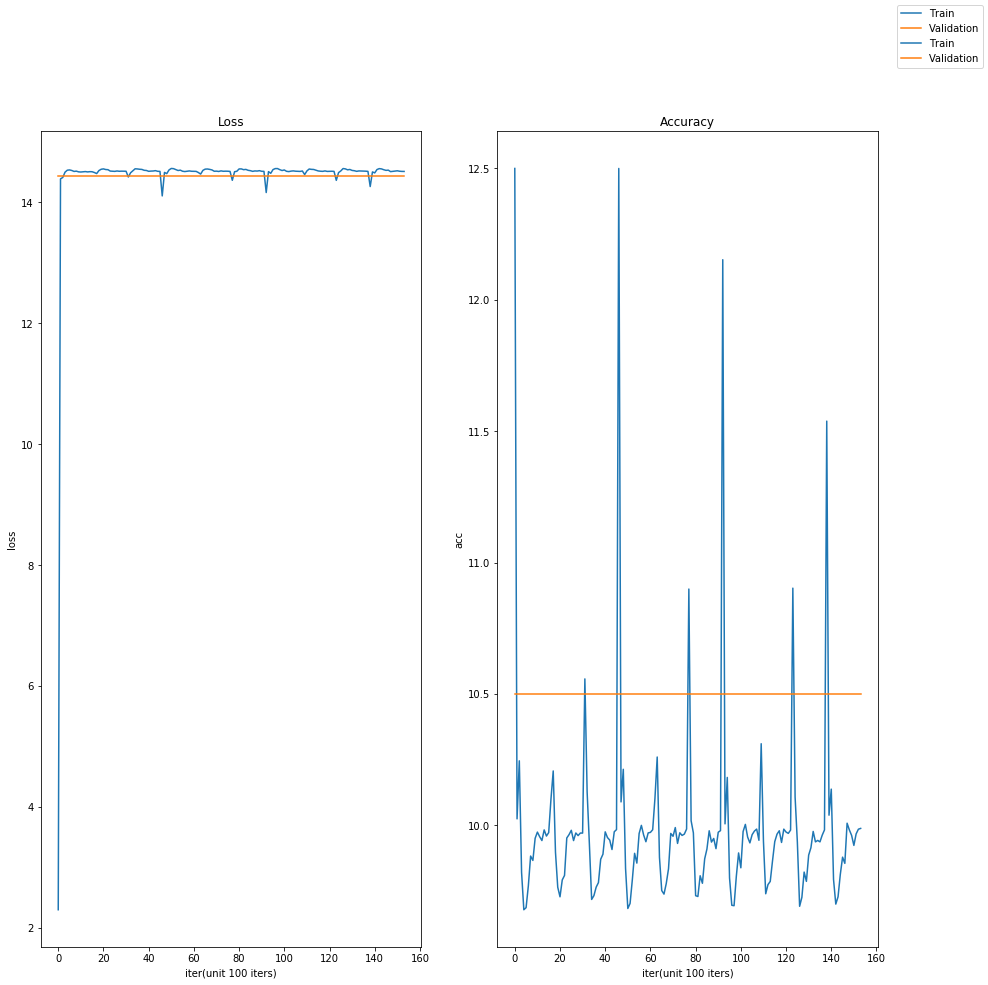

acy: 9.922551155090332, Val Loss: 2.3043363094329834, Val Accuracy: 9.800000190734863
INFO:tensorflow:Assets written to: saved_model/trained_0/assets
Iteration 1600, Epoch 2/10, Loss: 2.305140733718872, Accuracy: 9.601449012756348, Val Loss: 2.3063101768493652, Val Accuracy: 7.800000190734863
Iteration 1700, Epoch 2/10, Loss: 2.30399489402771, Accuracy: 9.670858383178711, Val Loss: 2.3054893016815186, Val Accuracy: 10.199999809265137
Iteration 1800, Epoch 2/10, Loss: 2.304041862487793, Accuracy: 9.793214797973633, Val Loss: 2.3013994693756104, Val Accuracy: 11.200000762939453
Iteration 1900, Epoch 2/10, Loss: 2.304023504257202, Accuracy: 9.646002769470215, Val Loss: 2.3024415969848633, Val Accuracy: 11.200000762939453
Iteration 2000, Epoch 2/10, Loss: 2.303980588912964, Accuracy: 9.688166618347168, Val Loss: 2.3067617416381836, Val Accuracy: 7.90000057220459
Iteration 2100, Epoch 2/10, Loss: 2.30407977104187, Accuracy: 9.677064895629883, Val Loss: 2.302248954772949, Val Accuracy: 10.69

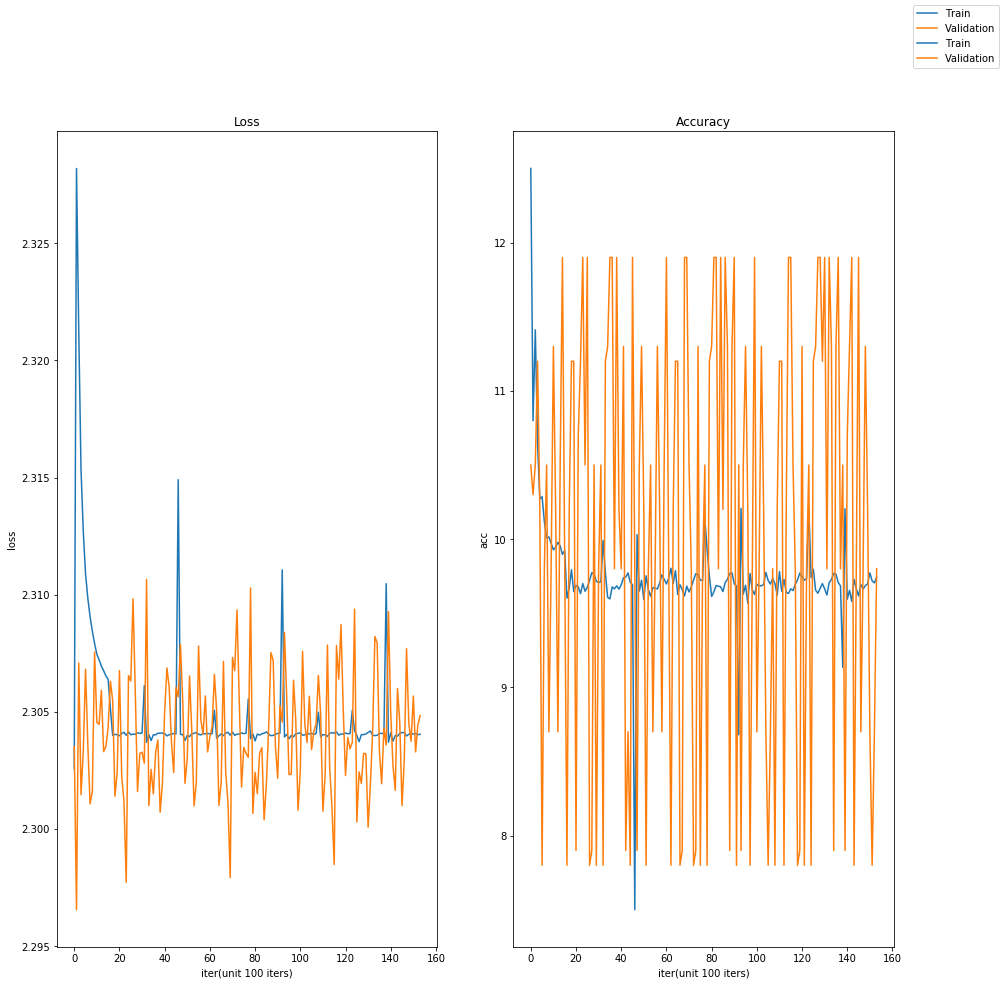

98, Val Accuracy: 44.70000076293945
INFO:tensorflow:Assets written to: saved_model/trained_0/assets
Iteration 1600, Epoch 2/10, Loss: 1.4588160514831543, Accuracy: 45.65217590332031, Val Loss: 1.4374302625656128, Val Accuracy: 49.20000076293945
Iteration 1700, Epoch 2/10, Loss: 1.4751707315444946, Accuracy: 46.024410247802734, Val Loss: 1.5113494396209717, Val Accuracy: 46.0
Iteration 1800, Epoch 2/10, Loss: 1.4607287645339966, Accuracy: 46.410316467285156, Val Loss: 1.440139889717102, Val Accuracy: 48.29999923706055
Iteration 1900, Epoch 2/10, Loss: 1.4638192653656006, Accuracy: 46.2906494140625, Val Loss: 1.380431890487671, Val Accuracy: 49.29999923706055
Iteration 2000, Epoch 2/10, Loss: 1.4607957601547241, Accuracy: 46.66844177246094, Val Loss: 1.4075298309326172, Val Accuracy: 48.79999923706055
Iteration 2100, Epoch 2/10, Loss: 1.4584071636199951, Accuracy: 46.90245819091797, Val Loss: 1.3749568462371826, Val Accuracy: 49.5
Iteration 2200, Epoch 2/10, Loss: 1.4480042457580566, Acc

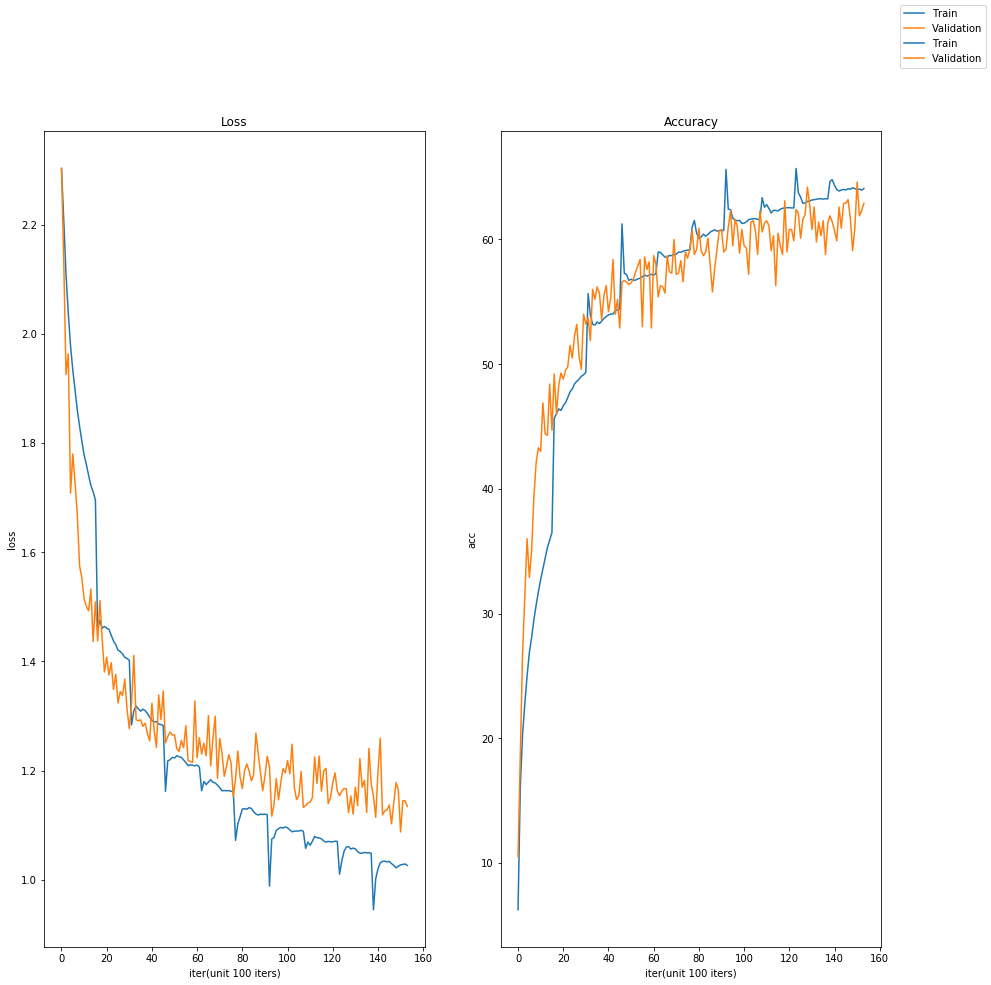

: 28.52473258972168, Val Loss: 1.7143887281417847, Val Accuracy: 37.400001525878906
INFO:tensorflow:Assets written to: saved_model/trained_0/assets
Iteration 1600, Epoch 2/10, Loss: 1.7107723951339722, Accuracy: 36.548912048339844, Val Loss: 1.7040818929672241, Val Accuracy: 36.39999771118164
Iteration 1700, Epoch 2/10, Loss: 1.7056926488876343, Accuracy: 37.5739631652832, Val Loss: 1.7028595209121704, Val Accuracy: 36.89999771118164
Iteration 1800, Epoch 2/10, Loss: 1.6886969804763794, Accuracy: 37.4302978515625, Val Loss: 1.6603693962097168, Val Accuracy: 41.29999923706055
Iteration 1900, Epoch 2/10, Loss: 1.6930210590362549, Accuracy: 37.330623626708984, Val Loss: 1.6316667795181274, Val Accuracy: 40.099998474121094
Iteration 2000, Epoch 2/10, Loss: 1.6891758441925049, Accuracy: 37.486671447753906, Val Loss: 1.649568796157837, Val Accuracy: 40.099998474121094
Iteration 2100, Epoch 2/10, Loss: 1.6849703788757324, Accuracy: 37.697715759277344, Val Loss: 1.6024785041809082, Val Accurac

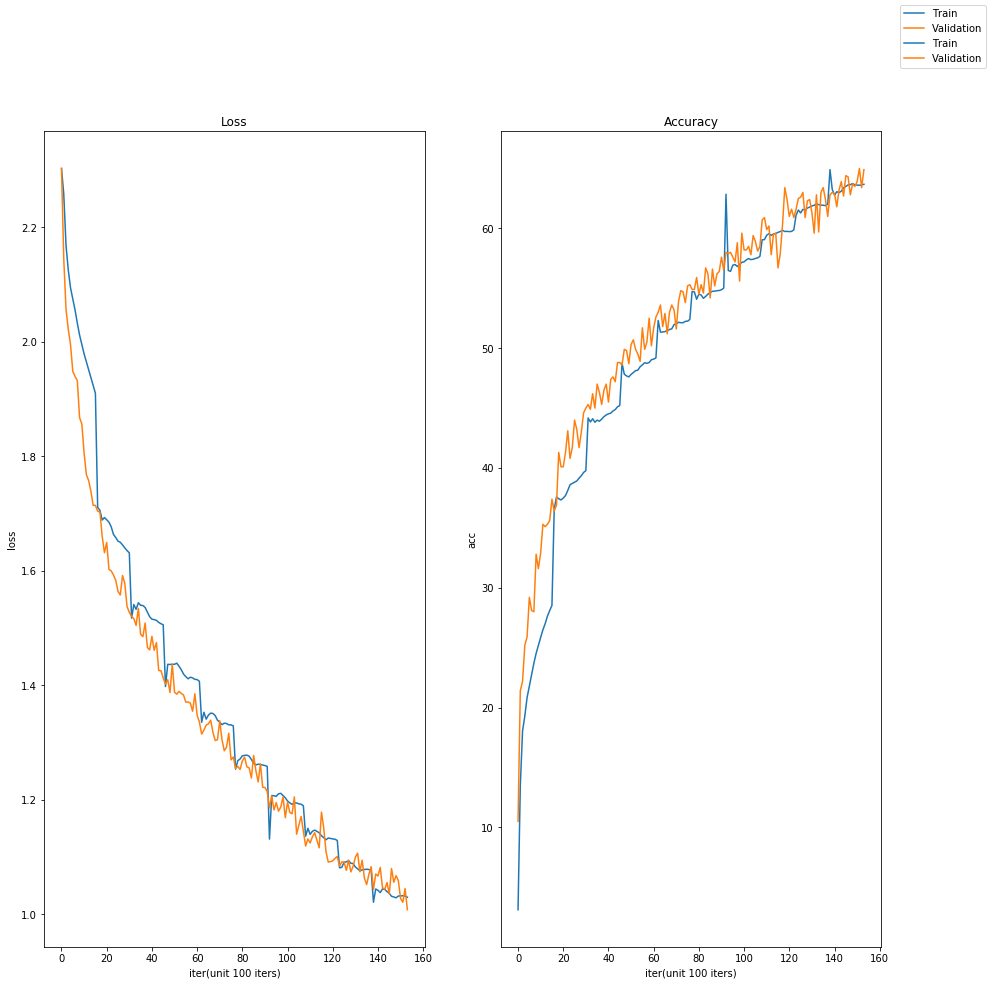

Loss: 1.058040976524353,Test Accuracy: 63.5


In [20]:
from cnn_model import *
from solver import *
learning_rates = [10, 1,0.1,0.01,0.001,0.0001]


lr_model_result = [] 
for learning_rate in learning_rates:
    model_option = {
    'conv_reg':0.00, 
    }
    adam_model = Lennet5(in_channel=3, out_channel=10,options=model_option)
    data_set = {
        'train_data': X_train,
        'train_label': y_train,
        'val_data':X_val,
        'val_label':y_val,
    }
    train_options = {
        'optimizer': 'adam',
        'lr': learning_rate,
        'epoch_num': 10,
    }

    solver= Solver(adam_model,data_set,options=train_options)
    solver.train()
    test_loss, test_acc = solver.test_model(X_test,y_test)
    lr_model_result.append(test_acc)


In [21]:
for i,test_acc in enumerate(lr_model_result):
    print('Learning rate: {}, Test accuracy: {}'.format(learning_rates[i],test_acc))

Learning rate: 10, Test accuracy: 0.10000000149011612
Learning rate: 1, Test accuracy: 0.10000000149011612
Learning rate: 0.1, Test accuracy: 0.10000000149011612
Learning rate: 0.01, Test accuracy: 0.10000000149011612
Learning rate: 0.001, Test accuracy: 0.5978999733924866
Learning rate: 0.0001, Test accuracy: 0.6349999904632568


## Question 10


4819336, Val Loss: 1.739878535270691, Val Accuracy: 36.79999923706055
INFO:tensorflow:Assets written to: saved_model/trained_0/assets
Iteration 1600, Epoch 2/10, Loss: 1.7096946239471436, Accuracy: 38.088768005371094, Val Loss: 1.6600227355957031, Val Accuracy: 37.400001525878906
Iteration 1700, Epoch 2/10, Loss: 1.6977473497390747, Accuracy: 39.275150299072266, Val Loss: 1.7822372913360596, Val Accuracy: 35.900001525878906
Iteration 1800, Epoch 2/10, Loss: 1.694404125213623, Accuracy: 38.9637565612793, Val Loss: 1.7743439674377441, Val Accuracy: 37.400001525878906
Iteration 1900, Epoch 2/10, Loss: 1.6957919597625732, Accuracy: 38.63482666015625, Val Loss: 1.647519588470459, Val Accuracy: 38.5
Iteration 2000, Epoch 2/10, Loss: 1.695548176765442, Accuracy: 38.68603515625, Val Loss: 1.6695212125778198, Val Accuracy: 40.70000076293945
Iteration 2100, Epoch 2/10, Loss: 1.693966269493103, Accuracy: 38.8016242980957, Val Loss: 1.6427912712097168, Val Accuracy: 42.0
Iteration 2200, Epoch 2/10

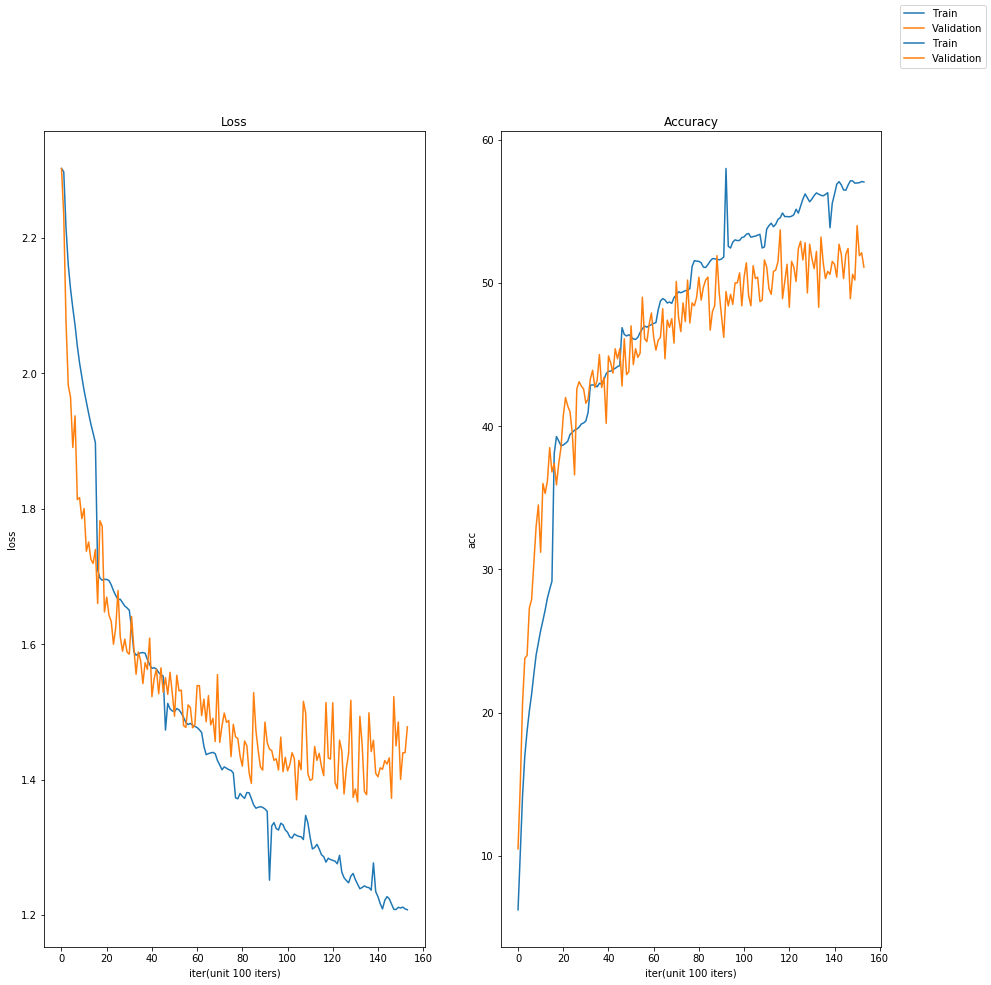

In [22]:
#Without Pre-processing 
from cnn_model import *
from solver import *
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =False) #load the data without pre-processing
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

model_option = {
    'conv_reg':0.00, 
}
adam_model = Lennet5(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.001,
    'epoch_num': 10,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()


In [23]:
no_prep_test_loss, no_prep_test_acc = solver.test_model(X_test,y_test)



Loss: 1.464691400527954,Test Accuracy: 50.410003662109375


s: 1.650612473487854, Accuracy: 38.555545806884766, Val Loss: 1.5206825733184814, Val Accuracy: 43.79999923706055
INFO:tensorflow:Assets written to: saved_model/trained_0/assets
Iteration 1600, Epoch 2/10, Loss: 1.3961386680603027, Accuracy: 49.81884002685547, Val Loss: 1.349157452583313, Val Accuracy: 53.500003814697266
Iteration 1700, Epoch 2/10, Loss: 1.417561411857605, Accuracy: 49.05695343017578, Val Loss: 1.4545907974243164, Val Accuracy: 50.599998474121094
Iteration 1800, Epoch 2/10, Loss: 1.4069666862487793, Accuracy: 49.17518615722656, Val Loss: 1.3910508155822754, Val Accuracy: 51.79999923706055
Iteration 1900, Epoch 2/10, Loss: 1.4076052904129028, Accuracy: 49.127708435058594, Val Loss: 1.3861000537872314, Val Accuracy: 52.0
Iteration 2000, Epoch 2/10, Loss: 1.4003642797470093, Accuracy: 49.60021209716797, Val Loss: 1.4051157236099243, Val Accuracy: 52.0
Iteration 2100, Epoch 2/10, Loss: 1.3959096670150757, Accuracy: 49.76383972167969, Val Loss: 1.3272088766098022, Val Accur

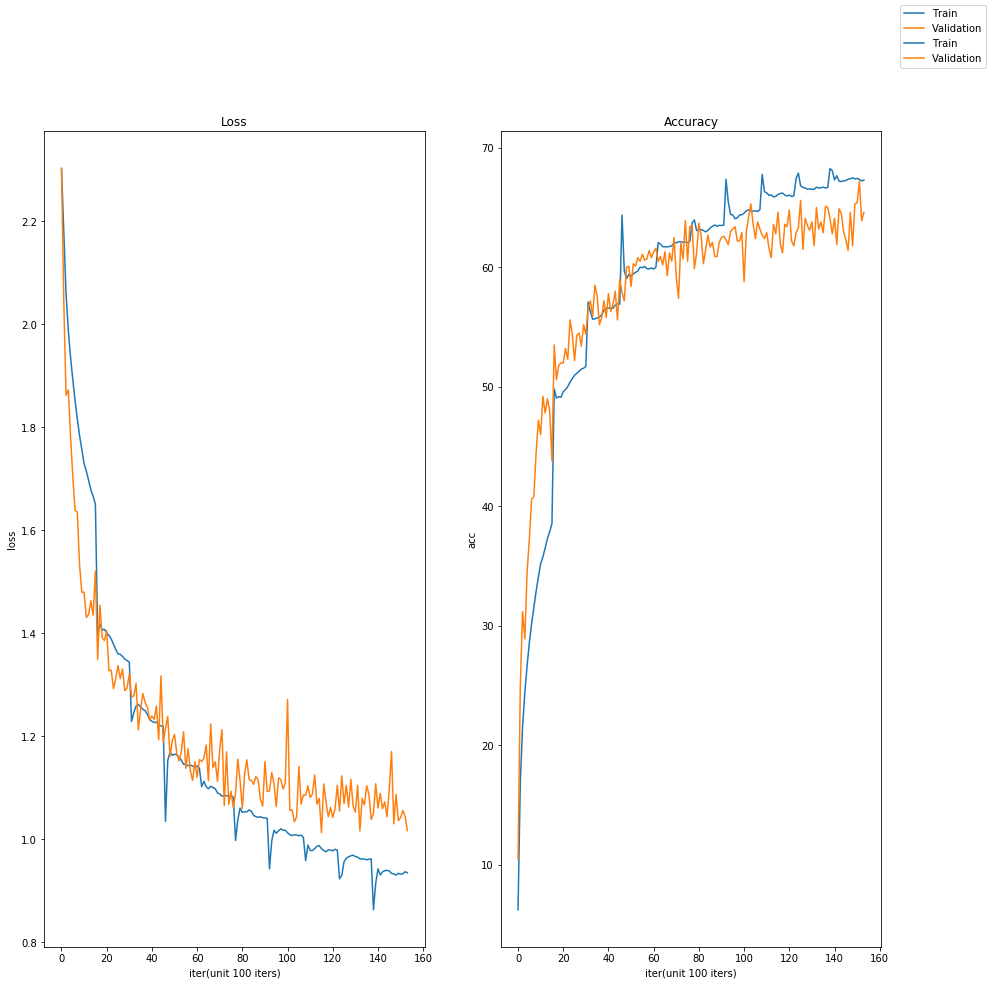

In [24]:
#With processing 
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =True) #load the data with processing
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

model_option = {
    'conv_reg':0.00, 
}
adam_model = Lennet5(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.001,
    'epoch_num': 10,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()

In [25]:
prep_test_loss, prep_test_acc = solver.test_model(X_test,y_test)
print("Test accuracy without preprocessing: {}".format(no_prep_test_acc))
print("Test accuracy with preprocessing: {}".format(prep_test_acc))



Loss: 1.0889188051223755,Test Accuracy: 63.75
Test accuracy without preprocessing: 0.5041000247001648
Test accuracy with preprocessing: 0.637499988079071


## Question 11

.00176239013672, Val Loss: 1.1521707773208618, Val Accuracy: 67.4000015258789
Iteration 62800, Epoch 41/50, Loss: 0.43860530853271484, Accuracy: 85.01808166503906, Val Loss: 1.0971037149429321, Val Accuracy: 70.0999984741211
INFO:tensorflow:Assets written to: saved_model/trained_40/assets
Iteration 62900, Epoch 42/50, Loss: 0.4199860692024231, Accuracy: 86.48174285888672, Val Loss: 1.1535046100616455, Val Accuracy: 69.4000015258789
Iteration 63000, Epoch 42/50, Loss: 0.43513739109039307, Accuracy: 85.5820083618164, Val Loss: 1.126741886138916, Val Accuracy: 68.9000015258789
Iteration 63100, Epoch 42/50, Loss: 0.4313827157020569, Accuracy: 85.46713256835938, Val Loss: 1.1062895059585571, Val Accuracy: 70.5
Iteration 63200, Epoch 42/50, Loss: 0.43329790234565735, Accuracy: 85.41934204101562, Val Loss: 1.0808991193771362, Val Accuracy: 71.0
Iteration 63300, Epoch 42/50, Loss: 0.4295694828033447, Accuracy: 85.50613403320312, Val Loss: 1.1068592071533203, Val Accuracy: 70.4000015258789
Iter

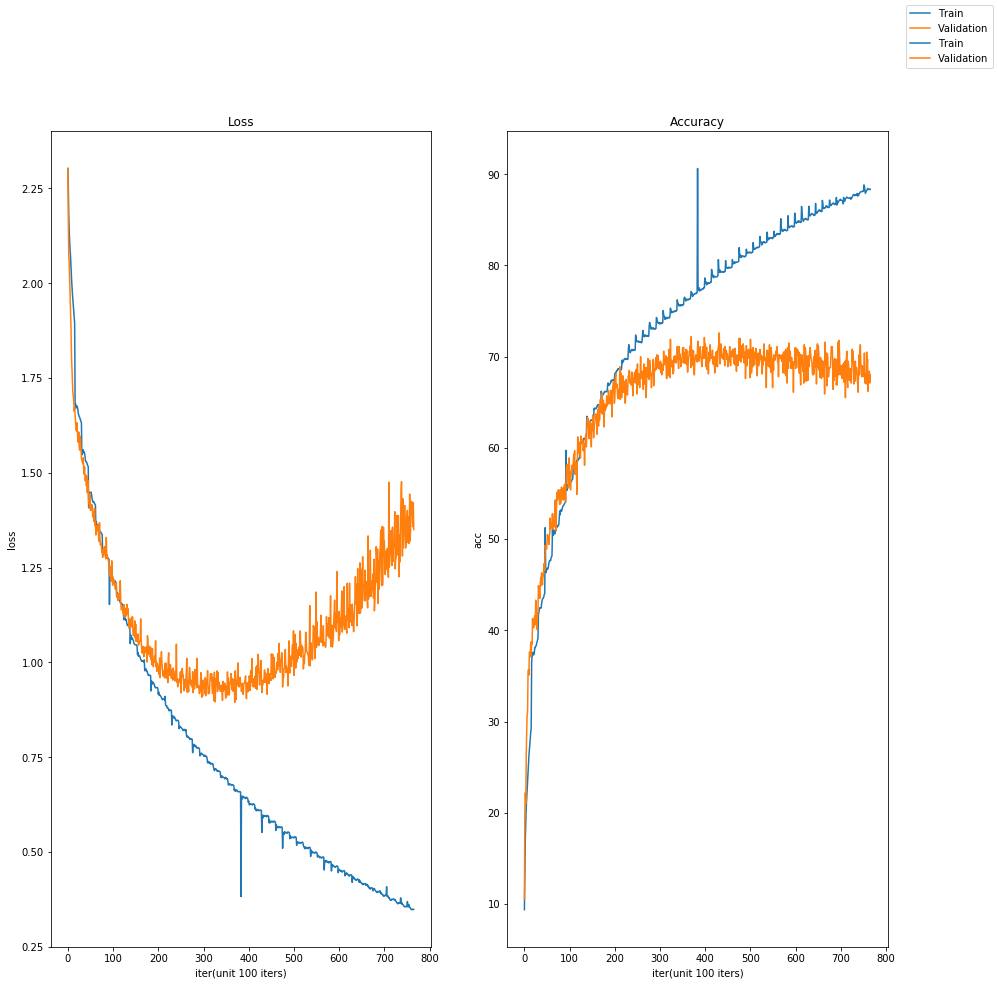

In [26]:
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =True) #load the data with processing

model_option = {
    'conv_reg':0.02, 
}
adam_model = Lennet5(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.0001,
    'epoch_num': 50,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()

In [31]:
prep_test_loss, prep_test_acc = solver.test_model(X_test,y_test)



Loss: 1.3944834470748901,Test Accuracy: 67.98999786376953


## Question 12 

s: 1.8131169080734253, Val Accuracy: 72.29999542236328
Iteration 109000, Epoch 72/80, Loss: 0.1312798708677292, Accuracy: 95.10098266601562, Val Loss: 1.7834258079528809, Val Accuracy: 71.9000015258789
Iteration 109100, Epoch 72/80, Loss: 0.13342039287090302, Accuracy: 95.10828399658203, Val Loss: 1.7928403615951538, Val Accuracy: 71.4000015258789
Iteration 109200, Epoch 72/80, Loss: 0.13283370435237885, Accuracy: 95.11946105957031, Val Loss: 1.8686474561691284, Val Accuracy: 71.0
Iteration 109300, Epoch 72/80, Loss: 0.13274186849594116, Accuracy: 95.19139862060547, Val Loss: 1.7632790803909302, Val Accuracy: 71.4000015258789
Iteration 109400, Epoch 72/80, Loss: 0.12952107191085815, Accuracy: 95.39944458007812, Val Loss: 1.7653789520263672, Val Accuracy: 71.9000015258789
Iteration 109500, Epoch 72/80, Loss: 0.1296709030866623, Accuracy: 95.37894439697266, Val Loss: 1.8327738046646118, Val Accuracy: 70.0
Iteration 109600, Epoch 72/80, Loss: 0.127329483628273, Accuracy: 95.49532318115234

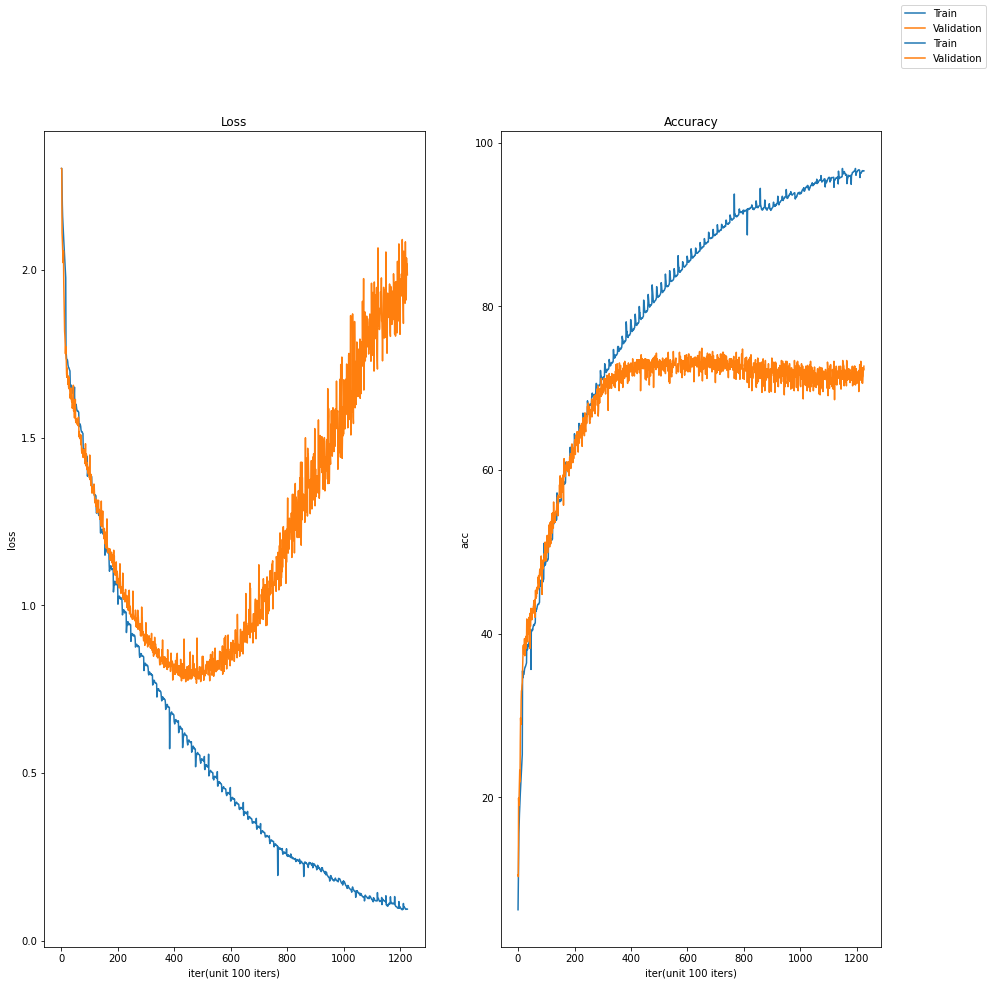

In [9]:

from cnn_model import *
from solver import *
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =True) #load the data with processing
model_option = {
    'conv_reg':0.01, 
}
adam_model = Conv3net(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.0001,
    'epoch_num': 80,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()

In [10]:
prep_test_loss, prep_test_acc = solver.test_model(X_test,y_test)

Loss: 2.0696496963500977,Test Accuracy: 71.05000305175781


ssets written to: saved_model/trained_30/assets
Iteration 47500, Epoch 32/40, Loss: 0.21650168299674988, Accuracy: 93.05555725097656, Val Loss: 1.3574782609939575, Val Accuracy: 71.0
Iteration 47600, Epoch 32/40, Loss: 0.2599181830883026, Accuracy: 91.19839477539062, Val Loss: 1.210662603378296, Val Accuracy: 72.29999542236328
Iteration 47700, Epoch 32/40, Loss: 0.2625060975551605, Accuracy: 90.93899536132812, Val Loss: 1.181247353553772, Val Accuracy: 71.0
Iteration 47800, Epoch 32/40, Loss: 0.2727554738521576, Accuracy: 90.66545104980469, Val Loss: 1.2011488676071167, Val Accuracy: 72.5
Iteration 47900, Epoch 32/40, Loss: 0.2688862681388855, Accuracy: 90.70140838623047, Val Loss: 1.3198455572128296, Val Accuracy: 69.5
Iteration 48000, Epoch 32/40, Loss: 0.2727046012878418, Accuracy: 90.52676391601562, Val Loss: 1.2608742713928223, Val Accuracy: 71.0
Iteration 48100, Epoch 32/40, Loss: 0.2719397246837616, Accuracy: 90.6557846069336, Val Loss: 1.2202045917510986, Val Accuracy: 69.40000

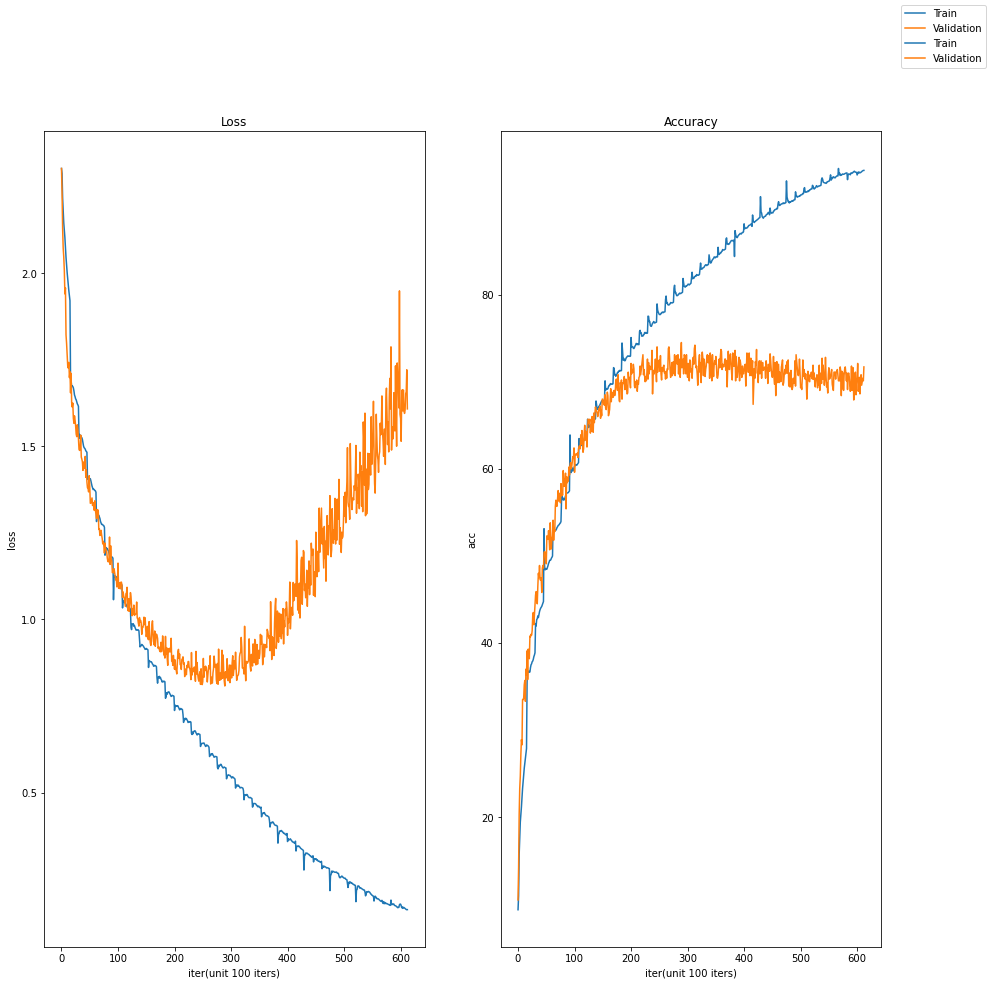

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(subtract_mean =True) #load the data with processing
from cnn_model import *
from solver import *
model_option = {
    'conv_reg':0.01, 
    'kernel_size':5, 
}
adam_model = Conv3net(in_channel=3, out_channel=10,options=model_option)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
train_options = {
    'optimizer': 'adam',
    'lr': 0.0001,
    'epoch_num': 40,
}

solver= Solver(adam_model,data_set,options=train_options)
solver.train()

In [12]:
prep_test_loss, prep_test_acc = solver.test_model(X_test,y_test)

Loss: 1.8586746454238892,Test Accuracy: 69.95999908447266
